In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# Q1 ID3


# Tree

class TreeNode :
    def __init__(self,el):
        self.data = el
        self.children = {}
        
    def add_child(self, key , node):
        self.children[key] = node

# def plot_tree(node, x=0.5, y=1, depth=0, dx=0.9, dy=0.15, ax=None, parent_x=None, parent_y=None, edge_label=None):
#     if ax is None:
#         fig, ax = plt.subplots(figsize=(10, 6))
#         ax.set_xlim(0, 1)
#         ax.set_ylim(0, 1)
#         ax.axis("off")

#     ax.text(x, y, node.data, bbox=dict(facecolor="lightgreen", edgecolor="black"), ha="center", fontsize=12, weight="bold")

#     if parent_x is not None:
#         ax.plot([parent_x, x], [parent_y - 0.02, y + 0.02], "k-", lw=1.5)
#         ax.text((parent_x + x) / 2, (parent_y + y) / 2, edge_label, fontsize=10, ha="center", color="red", backgroundcolor="white")

#     num_children = len(node.children)
#     if num_children == 0:
#         return

#     spacing = dx / max(1, num_children - 1)

#     for i, (edge_value, child) in enumerate(node.children.items()):
#         child_x = x - dx / 2 + i * spacing
#         child_y = y - dy
#         plot_tree(child, child_x, child_y, depth + 1, dx / 2, dy, ax, x, y, edge_value)

#     if depth == 0:
#         plt.show()


def pre_order_traversal(node):
    if node is None:
        return
    print("val: ",node.data)
    print("Children",node.children.keys())
    print()

    for child in node.children.values():
        pre_order_traversal(child)
        

age
├── (middle_aged)
│   yes
├── (senior)
│   credit_rating
│   ├── (excellent)
│   │   no
│   ├── (fair)
│   │   yes
├── (youth)
│   student
│   ├── (no)
│   │   no
│   ├── (yes)
│   │   yes


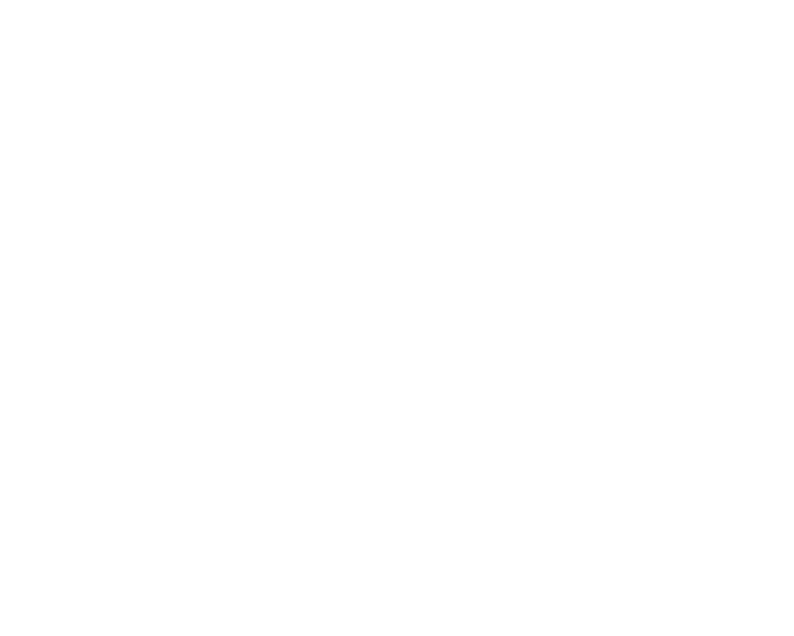

In [2]:
def findInnerEntropy(data):
    counts = data['buys_computer'].value_counts()
    num_row = len(data['buys_computer'])
    
    entropy = 0.0
    for x in counts:
        entropy-= ( (x/num_row)*math.log2(x/num_row) )
    
    return entropy

def findColumnEntropy(data , col):
    unique_val = data[col].unique()
    totalRows = data.shape[0]
    
    col_entropy = 0.0
    for col_class in unique_val:
        newData = data[data[col]==col_class]
        num_row = newData.shape[0]
        col_entropy += ( (num_row/totalRows)*findInnerEntropy(newData) )
        
    return col_entropy

def findSplittingColumn_old(data):
    entropy = {}
    
    for col in list(data):
        entropy[col] = findColumnEntropy(data , col)
    
    gain = {}
    
    for col in entropy:
        gain[col] = entropy[col] - entropy['buys_computer']
    
    # Returns Key with val
    max_key = max(gain, key=gain.get)
    return max_key

def findSplittingColumn(data):
    initial_entropy = findInnerEntropy(data)
    entropy = {}

    for col in list(data.columns):
        if col != 'buys_computer':
            entropy[col] = findColumnEntropy(data, col)

    gain = {col: initial_entropy - entropy[col] for col in entropy}
    
#     print("Entropy: ",entropy)
#     print("Gain: ",gain)
    
    return max(gain, key=gain.get)


def splitData(data,split_column):
    split_dfs = [group for _, group in data.groupby(split_column)]
    return split_dfs
      


def constructTree(data):
#     print("Current Data: \n",data)
    
    if( (data['buys_computer'] == 'yes').all() ):
        node = TreeNode('yes')
        return node
    elif((data['buys_computer'] == 'no').all() ):
        node = TreeNode('no')
        return node
    else:   #Split and recurse
        split_column = findSplittingColumn(data)
        dataList = splitData(data,split_column)
        
#         print("split Col: ", split_column)
#         if(currNode.data == '#'):
        currNode = TreeNode(split_column) 

        for dataElement in dataList:
            newData  = dataElement.drop(split_column,axis=1)
            currNode.add_child(dataElement[split_column].iloc[0],constructTree(newData))
        
        return currNode
    


def print_tree(node, indent=""):
    if node is None:
        return
    
    print(indent + str(node.data))  # Print current node
    
    for edge, child in node.children.items():
        print(indent + "├── (" + str(edge) + ")")
        print_tree(child, indent + "│   ")  # Recursively print children with indentation

    
# root = TreeNode('#')
data = pd.read_excel('Input.xlsx')
root = constructTree(data)

print_tree(root)

fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')
# plot_tree(root)
plt.show()
